In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#definido os nomes das colunas
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#importando o dataset e transformando em dataframe
df = pd.read_csv('C:/Users/deand/OneDrive/estudy/Iris/iris.csv', names=names,encoding='utf-8')

In [3]:
#verificando se a importação foi bem sucedida
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#verificando tipos de dados, temos (object e float64) e precisamos alterar isso para termos melhor desempenho no futuro
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# primeiro vamos alterar os valores da coluna class, sendo assim iris-setosa == 1, iris-versicolor == 2 , iris-virginica == 3.
df = df.replace(['class'], np.nan)

In [6]:
#Busca todos o valores iguais a iris-setosa e os substitui por 1
df['class'] = df['class'].replace(['Iris-setosa'], 1)

In [7]:
#Busca todos o valores iguais a iris-versiclor e os substitui por 2
df['class'] = df['class'].replace(['Iris-versicolor'], 2)

In [8]:
#Busca todos o valores iguais a iris-virginica e os substitui por 3
df['class'] = df['class'].replace(['Iris-virginica'], 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
#notamos que os valores de object mudaram para int vamos alterar para float64
df['class'] = df['class'].astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [12]:
#para confirmar podemos usar a função .mean() ou .plot() assim temos certeza que os dados foram alterados com sucesso
df['class'].mean()

2.0

<AxesSubplot:>

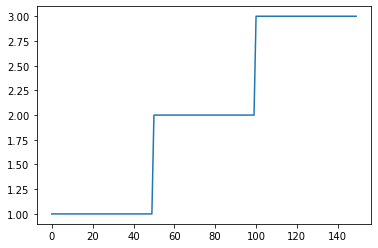

In [13]:
df['class'].plot()

#nossa formatação e conversão foram bem sucedidas

In [14]:
#verificando se tem dados duplicados
duplicados = df[df.duplicated(keep='first')]
print(duplicados)

     sepal-length  sepal-width  petal-length  petal-width  class
34            4.9          3.1           1.5          0.1    1.0
37            4.9          3.1           1.5          0.1    1.0
142           5.8          2.7           5.1          1.9    3.0


In [15]:
#removendo as duplicatas mas deixando primeira ocorrência da repetição para não desperdiçar dados
df.drop_duplicates(keep='first', inplace=True)

In [16]:
#vamos utilizar o metodo .isnull() junto de .sum() para identificar se há dados faltantes
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [17]:
# conjunto de valdação de dados, 80% para teste e 20% para validação
array = df.values
X = array[:, :-1]
Y = array[:, 4]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [18]:
X.shape, Y.shape

((147, 4), (147,))

In [19]:
#aplicando .fit() e .predict()
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
resultado = knn.predict(X_validation)
#accuracy_score(Y_validation, resultado, normalize=True)


In [20]:
print(confusion_matrix(Y_validation, resultado))

[[ 8  0  0]
 [ 0  8  1]
 [ 0  1 12]]


In [21]:
#exibindo as metricas do dataset
df.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,2.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.400000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [22]:
print("Acurácia: %3.2f" % metrics.accuracy_score(resultado,Y_validation))

Acurácia: 0.93


In [23]:
import joblib as jb
from joblib import dump, load

In [24]:
dump(knn, 'modelo_KNN.pk1')

['modelo_KNN.pk1']

In [25]:
import streamlit as st